In [2]:
from scipy import signal
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

In [24]:
file_path = './data/train_audio/abethr1/XC128013.ogg'
data, sample_rate = torchaudio.load(file_path)

In [25]:
max_val = data.abs().max().numpy() # 데이터의 최대 진폭(음량)
data = data.numpy()
audio = data / max_val

[[-6.0284287e-06  1.5520194e-06 -9.4177591e-07 ... -1.0487776e-04
   9.5984008e-04  9.1357308e-04]]


In [29]:
def next_power_of_two(n):
    return int(2 ** np.ceil(np.log2(n)))

win_length = int(np.ceil(sample_rate * 0.05))
nfft = next_power_of_two(win_length)
hop_length = int(np.ceil(sample_rate * 0.01))
print(f'nfft: {nfft}, win_length: {win_length}, hop_length: {hop_length}')

nfft: 2048, win_length: 1600, hop_length: 320


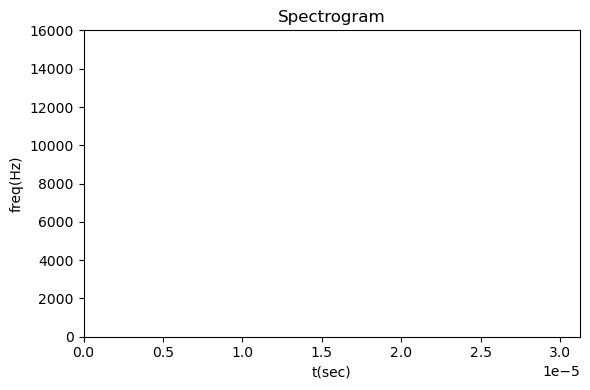

In [34]:
eps = 1e-12

fig, ax = plt.subplots(figsize=(6,4))
f, t, Sxx = signal.spectrogram(
    data, nfft=nfft, fs=sample_rate, window=signal.windows.hann(nfft), nperseg=nfft, noverlap=win_length, scaling='spectrum'
)

# Sxx의 차원을 pcolormesh가 기대하는 차원에 맞도록 조정합니다.
Sxx = np.squeeze(Sxx)

ax.pcolormesh(t, f, 10 * np.log10(Sxx + eps), vmin=-60, vmax=0, cmap='jet')
ax.set_title('Spectrogram')
ax.set_xlim([0, len(data) / sample_rate])
ax.set_xlabel('t(sec)')
ax.set_ylabel('freq(Hz)')
fig.tight_layout()